# Uber Rides Exploratory Data Analysis 

In [314]:
#Importing required libraries:

import pandas as pd               #for analyzing data             
import seaborn as sns             #for visualizing data          
import matplotlib.pyplot as plt   #for visualizing data 
%matplotlib inline  

import warnings 
warnings.filterwarnings(action= 'ignore')

### Loading the dataset

In [315]:
#Loading the dataset

data = pd.read_csv('Uber_drives_data.csv')
print(data.shape)                  #printing the number of rows and columns respectively
data.head(5)                       #printing the top 5 rows

(1155, 7)


,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


The dataset has 1155 rows and 7 columns.

In [316]:
#Renaming column names for clarity:

data.columns = ['Start_Date','End_Date','Category','Start_Point','Stop_Point','Miles','Purpose']
data.head(5)    #printing top 5 rows

,Start_Date,End_Date,Category,Start_Point,Stop_Point,Miles,Purpose
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


The given dataset has 1155 rows and 7 columns, containing all the information about the Uber rides. The user has booked 1155 rides over the year.

In [317]:
#Understanding the data more:

data.describe()    #for statistical description of data

,Miles
count,1155.000000
mean,10.566840
std,21.579106
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,310.300000


Here, as maximum miles is more than (mean + 3*standard deviation) value, it seems that the dataset has outliers present in it.

### Data Cleaning

In [318]:
#Checking the need for data cleaning:

data.info()      #gathering information about the non null count and data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Start_Date   1155 non-null   object 
 1   End_Date     1155 non-null   object 
 2   Category     1155 non-null   object 
 3   Start_Point  1155 non-null   object 
 4   Stop_Point   1155 non-null   object 
 5   Miles        1155 non-null   float64
 6   Purpose      653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


Out of 1155 values in Purpose column, only 653 have some values. Rest have null values.

In [319]:
#Checking if there is any duplicate value:

data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1150    False
1151    False
1152    False
1153    False
1154    False
Length: 1155, dtype: bool

The dataset does not have any duplicate values.

In [320]:
data.isnull().sum()     #Counting number of null values

Start_Date       0
End_Date         0
Category         0
Start_Point      0
Stop_Point       0
Miles            0
Purpose        502
dtype: int64

Clearly, the dataset does have null values. The data needs to be cleaned in order to do its analysis and visualization.

<AxesSubplot:>

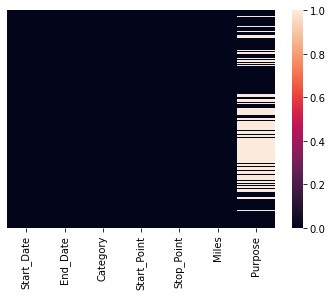

In [321]:
sns.heatmap(data.isnull(), yticklabels = False)   #Visualization of null values

Clearly, the 'Purpose' column contains a lot of null values. The null values in Purpose column can't be dropped as doing this leads to working with approximately half of the data. 

In [322]:
#Setting null values in the Purpose column to 'Unknown' as the purpose is not mentioned for them

data['Purpose'] = data['Purpose'].fillna('Unknown')
data.head()


,Start_Date,End_Date,Category,Start_Point,Stop_Point,Miles,Purpose
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,Unknown
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [323]:
#Checking if data is cleaned or not:

data.isnull().sum()

Start_Date     0
End_Date       0
Category       0
Start_Point    0
Stop_Point     0
Miles          0
Purpose        0
dtype: int64

Clearly, there are no null values left.

<AxesSubplot:>

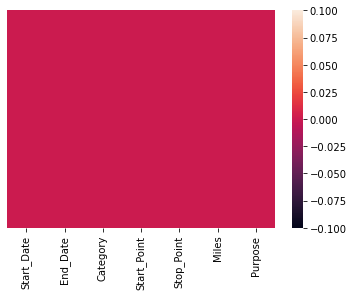

In [324]:
sns.heatmap(data.isnull(), yticklabels = False)

Clearly, there are no null values left.

### Outliers Detection

<AxesSubplot:>

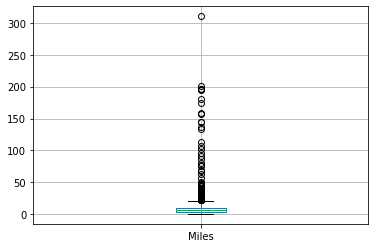

In [325]:
#Identifying outliers in data

data[['Miles']].boxplot()

Clearly, the miles column has a lot of outliers which need to be handled.

Text(0.5, 1.0, 'Distribution of Miles')

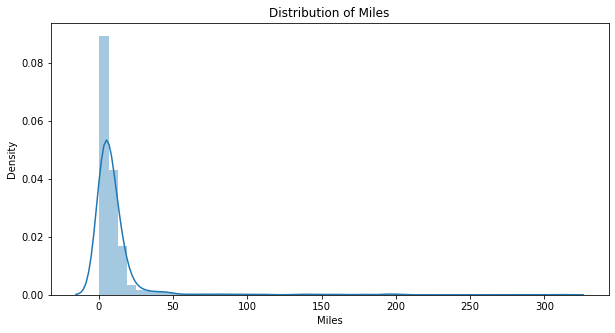

In [326]:
#Checking the distribution of miles of the Uber rides:

plt.figure(figsize=(10,5))
sns.distplot(data.Miles)
plt.title("Distribution of Miles")

The distribution plot clearly shows that outliers are present and the data is positively skewed.

In [327]:
#Skewness of Miles column values
data.Miles.skew()

7.221969847564774

The distribution of Miles column values is highly skewed towards right. This means the outliers are present towards the right. A positive skew indicates that the dataset has many values much greater than the mean and it has very less values lesser than the mean. 

In [328]:
#Identifying outliers in the Miles column

Q1 = data.Miles.quantile(0.25)
Q3 = data.Miles.quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
data[(data.Miles < lower_limit) | (data.Miles > upper_limit)]


,Start_Date,End_Date,Category,Start_Point,Stop_Point,Miles,Purpose
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
25,1/14/2016 16:29,1/14/2016 17:05,Business,Houston,Houston,21.9,Customer Visit
36,1/20/2016 13:25,1/20/2016 14:19,Business,Raleigh,Cary,40.2,Customer Visit
62,02-01-2016 12:10,02-01-2016 12:43,Business,Chapel Hill,Cary,23.3,Customer Visit
108,2/16/2016 3:21,2/16/2016 4:13,Business,Katunayaka,Unknown Location,43.7,Customer Visit
...,...,...,...,...,...,...,...
979,11/20/2016 10:27,11/20/2016 11:32,Business,Cary,Cary,39.2,Between Offices
1088,12/21/2016 20:56,12/21/2016 23:42,Business,Rawalpindi,Unknown Location,103.0,Meeting
1089,12/22/2016 15:40,12/22/2016 16:38,Business,Unknown Location,Unknown Location,32.3,Meeting
1092,12/22/2016 17:56,12/22/2016 18:29,Business,Unknown Location,Unknown Location,23.2,Meeting


These are the outliers in the Miles column which need to be removed.

In [329]:
#Removing outliers from the Miles column

data_1 = data[(data.Miles > lower_limit) & (data.Miles < upper_limit)]
data_1

,Start_Date,End_Date,Category,Start_Point,Stop_Point,Miles,Purpose
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,Unknown
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
5,01-06-2016 17:15,01-06-2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
...,...,...,...,...,...,...,...
1149,12/30/2016 23:06,12/30/2016 23:10,Business,Kar?chi,Kar?chi,0.8,Customer Visit
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting


The dataset has reduced to 1078 rows after removal of the outliers.

<AxesSubplot:>

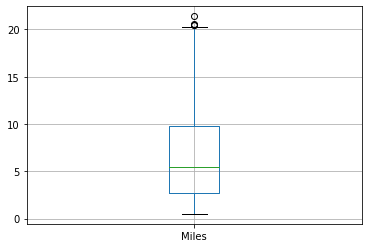

In [330]:
data_1[['Miles']].boxplot()

There are still a few outliers left.

In [331]:
#Checking the dataset with >20 miles rides

data_1[(data_1.Miles > 20)]

,Start_Date,End_Date,Category,Start_Point,Stop_Point,Miles,Purpose
119,2/17/2016 15:33,2/17/2016 16:17,Business,Colombo,Katunayaka,21.4,Temporary Site
291,04-01-2016 16:01,04-01-2016 16:49,Business,Orlando,Kissimmee,20.3,Meeting
362,05-09-2016 14:39,05-09-2016 15:06,Business,San Francisco,Palo Alto,20.5,Between Offices
687,8/21/2016 18:48,8/21/2016 19:24,Business,Islamabad,Unknown Location,20.2,Unknown
777,9/28/2016 17:21,9/28/2016 19:36,Business,Islamabad,Unknown Location,20.5,Unknown
822,10/17/2016 15:19,10/17/2016 15:57,Business,Cary,Raleigh,20.6,Unknown


In [374]:
#Removing the remaining outliers
data1 = data_1.drop([119, 822, 777, 362])
data1

,Start_Date,End_Date,Category,Start_Point,Stop_Point,Miles,Purpose
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,Unknown
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
5,01-06-2016 17:15,01-06-2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
...,...,...,...,...,...,...,...
1149,12/30/2016 23:06,12/30/2016 23:10,Business,Kar?chi,Kar?chi,0.8,Customer Visit
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting


<AxesSubplot:>

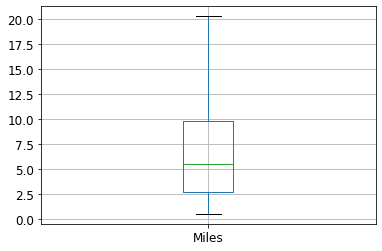

In [375]:
data1[['Miles']].boxplot()

The dataset is now outliers - free.

In [376]:
data1.describe()

,Miles
count,1074.000000
mean,6.550093
std,4.625571
min,0.500000
25%,2.700000
50%,5.500000
75%,9.800000
max,20.300000


Text(0.5, 1.0, 'Distribution of Miles')

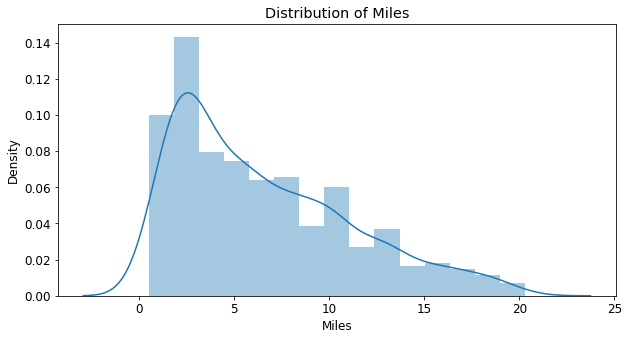

In [377]:
#Checking the distribution of miles of the Uber rides after removing outliers:

plt.figure(figsize=(10,5))
sns.distplot(data1.Miles)
plt.title("Distribution of Miles")

In [378]:
data1.Miles.skew()

0.8444614651283356

The distribution of the Miles column values is rightly skewed and the skewness has decreased after removing the outliers.. 

In [379]:
data1.describe()    #for statistical description of data

,Miles
count,1074.000000
mean,6.550093
std,4.625571
min,0.500000
25%,2.700000
50%,5.500000
75%,9.800000
max,20.300000


The dataset after the removal of Miles outliers indicates that the average miles that the user covers is around 8 miles. The minimum distance of the ride is 0.5 miles while the maximum distance of the ride is 20.3 miles.

At this stage, in the data, the start and end dates are given, but not the duration of the rides. The duration is needed in order to know how much time did the rides took. For this, it is needed to convert the Start Date and End Date data objects into datetime objects.

In [380]:
#Converting the Start_Date and End_Date date objects into datetime objects to get duration (Conversion to datetime object will lead to transformation of timing to HH:MM:DD format which will help in calculating the ride duration later):
#Using Pandas library

data1['Start_Date'] = pd.to_datetime(data1['Start_Date'])
data1['End_Date'] = pd.to_datetime(data1['End_Date'])

data1.head(5)

,Start_Date,End_Date,Category,Start_Point,Stop_Point,Miles,Purpose
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Unknown
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain


In [381]:
#Calculating duration of the rides:

data1['Ride_Duration'] = data1['End_Date'] - data1['Start_Date']

data1.head()

,Start_Date,End_Date,Category,Start_Point,Stop_Point,Miles,Purpose,Ride_Duration
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,0 days 00:06:00
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Unknown,0 days 00:12:00
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,0 days 00:13:00
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,0 days 00:14:00
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,0 days 00:04:00


In the dataset, the ride_duration is given in terms of days and time. Days need to be removed from the duration.

In [382]:
#Removing days from the Ride_Duration: (First converting the Ride_Duration into string type and then slicing the remaining part after days)

data1['Ride_Duration'] = data1['Ride_Duration'].astype(str).map(lambda x: x[7:])

data1.head(5)

,Start_Date,End_Date,Category,Start_Point,Stop_Point,Miles,Purpose,Ride_Duration
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,00:06:00
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Unknown,00:12:00
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,00:13:00
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,00:14:00
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,00:04:00


Segregating year, month, week day and day hour to get more information about the rides is needed.

In [383]:
#Creating new columns of year, month, day of the week and day hour:
#Converting the datetime format of the Start Date into different columns:

data1['Year'] = data1['Start_Date'].apply(lambda conversion: conversion.year)
data1['Month'] = data1['Start_Date'].apply(lambda conversion: conversion.month)
data1['Day'] = data1['Start_Date'].apply(lambda conversion: conversion.dayofweek)
data1['Hour'] = data1['Start_Date'].apply(lambda conversion: conversion.hour)

data1.head()

,Start_Date,End_Date,Category,Start_Point,Stop_Point,Miles,Purpose,Ride_Duration,Year,Month,Day,Hour
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,00:06:00,2016,1,4,21
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Unknown,00:12:00,2016,1,5,1
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,00:13:00,2016,1,5,20
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,00:14:00,2016,1,1,17
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,00:04:00,2016,1,2,17


For proper analysis, the Month and Day columns need to be in words, for example, 0 means Monday, 1 means Tuesday etc. in Day of the week column while in month column, 1 means January, 2 means February etc.

In [384]:
#Setting the month names

data1['Month'].replace({1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'}, inplace = True)
data1

,Start_Date,End_Date,Category,Start_Point,Stop_Point,Miles,Purpose,Ride_Duration,Year,Month,Day,Hour
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,00:06:00,2016,January,4,21
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Unknown,00:12:00,2016,January,5,1
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,00:13:00,2016,January,5,20
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,00:14:00,2016,January,1,17
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,00:04:00,2016,January,2,17
...,...,...,...,...,...,...,...,...,...,...,...,...
1149,2016-12-30 23:06:00,2016-12-30 23:10:00,Business,Kar?chi,Kar?chi,0.8,Customer Visit,00:04:00,2016,December,4,23
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,00:07:00,2016,December,5,1
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,00:18:00,2016,December,5,13
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,00:35:00,2016,December,5,15


In [385]:
#Setting the weekday names

data1['Day'].replace({0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}, inplace = True)
data1

,Start_Date,End_Date,Category,Start_Point,Stop_Point,Miles,Purpose,Ride_Duration,Year,Month,Day,Hour
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,00:06:00,2016,January,Friday,21
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Unknown,00:12:00,2016,January,Saturday,1
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,00:13:00,2016,January,Saturday,20
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,00:14:00,2016,January,Tuesday,17
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,00:04:00,2016,January,Wednesday,17
...,...,...,...,...,...,...,...,...,...,...,...,...
1149,2016-12-30 23:06:00,2016-12-30 23:10:00,Business,Kar?chi,Kar?chi,0.8,Customer Visit,00:04:00,2016,December,Friday,23
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,00:07:00,2016,December,Saturday,1
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,00:18:00,2016,December,Saturday,13
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,00:35:00,2016,December,Saturday,15


Here, 00:06:00 means 6 minutes duration while 01:07:00 means 1 hour, 7 minutes duration. 


In [386]:
data1.describe()

,Miles,Year,Hour
count,1074.000000,1074.0,1074.000000
mean,6.550093,2016.0,14.710428
std,4.625571,0.0,4.594959
min,0.500000,2016.0,0.000000
25%,2.700000,2016.0,12.000000
50%,5.500000,2016.0,15.000000
75%,9.800000,2016.0,18.000000
max,20.300000,2016.0,23.000000


In [387]:
#Checking the maximum and minimum durations of Uber rides:
a = data1['Ride_Duration'].max()
print('Maximum ride duration is:', a)

b = data1['Ride_Duration'].min()
print('Minimum ride duration is:', b)


Maximum ride duration is: 02:47:00
Minimum ride duration is: 00:00:00


As the minimum ride duration is 00:00:00, it means that ride(s) would be cancelled for some reasons.

In [388]:
#Checking the dataset with 0 duration

data1[(data1.Ride_Duration == '00:00:00')]

,Start_Date,End_Date,Category,Start_Point,Stop_Point,Miles,Purpose,Ride_Duration,Year,Month,Day,Hour
761,2016-09-16 07:08:00,2016-09-16 07:08:00,Business,Unknown Location,Unknown Location,1.6,Unknown,00:00:00,2016,September,Friday,7
798,2016-10-08 15:03:00,2016-10-08 15:03:00,Business,Karachi,Karachi,3.6,Unknown,00:00:00,2016,October,Saturday,15
807,2016-10-13 13:02:00,2016-10-13 13:02:00,Business,Islamabad,Islamabad,0.7,Unknown,00:00:00,2016,October,Thursday,13


Here, the ride duration is 0 seconds but there is some mileage, which shows that this is outlier and the data is wrongly entered. This data needs to be removed.

In [389]:
#Removing outliers from the dataset

data2 = data1.drop([761, 798, 807])
data2

,Start_Date,End_Date,Category,Start_Point,Stop_Point,Miles,Purpose,Ride_Duration,Year,Month,Day,Hour
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,00:06:00,2016,January,Friday,21
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Unknown,00:12:00,2016,January,Saturday,1
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,00:13:00,2016,January,Saturday,20
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,00:14:00,2016,January,Tuesday,17
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,00:04:00,2016,January,Wednesday,17
...,...,...,...,...,...,...,...,...,...,...,...,...
1149,2016-12-30 23:06:00,2016-12-30 23:10:00,Business,Kar?chi,Kar?chi,0.8,Customer Visit,00:04:00,2016,December,Friday,23
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,00:07:00,2016,December,Saturday,1
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,00:18:00,2016,December,Saturday,13
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,00:35:00,2016,December,Saturday,15


The final dataset is now reduced to 1071 rows. 

In [390]:
#Checking the maximum and minimum durations of Uber rides:
a = data2['Ride_Duration'].max()
print('Maximum ride duration is:', a)

b = data2['Ride_Duration'].min()
print('Minimum ride duration is:', b)


Maximum ride duration is: 02:47:00
Minimum ride duration is: 00:01:00


The maximum ride duration is 2 hours 47 minutes and minimum ride duration is 1 minute.

In [391]:
data2[(data2.Ride_Duration == '00:01:00')]

,Start_Date,End_Date,Category,Start_Point,Stop_Point,Miles,Purpose,Ride_Duration,Year,Month,Day,Hour
646,2016-08-10 18:49:00,2016-08-10 18:50:00,Business,Apex,Apex,1.0,Unknown,00:01:00,2016,August,Wednesday,18
786,2016-10-04 12:17:00,2016-10-04 12:18:00,Business,Unknown Location,Unknown Location,15.1,Unknown,00:01:00,2016,October,Tuesday,12


Clearly, the second entry is an outlier because it is not possible to cover 15.1 miles in 1 minute.

In [392]:
#Removing the outlier 

data3 = data2.drop([786])
data3

,Start_Date,End_Date,Category,Start_Point,Stop_Point,Miles,Purpose,Ride_Duration,Year,Month,Day,Hour
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,00:06:00,2016,January,Friday,21
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Unknown,00:12:00,2016,January,Saturday,1
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,00:13:00,2016,January,Saturday,20
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,00:14:00,2016,January,Tuesday,17
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,00:04:00,2016,January,Wednesday,17
...,...,...,...,...,...,...,...,...,...,...,...,...
1149,2016-12-30 23:06:00,2016-12-30 23:10:00,Business,Kar?chi,Kar?chi,0.8,Customer Visit,00:04:00,2016,December,Friday,23
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,00:07:00,2016,December,Saturday,1
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,00:18:00,2016,December,Saturday,13
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,00:35:00,2016,December,Saturday,15


The final dataset has reduced to 1070 rows. The dataset can now be visualized for further analysis.

### Visualizing the data

In [393]:
#Average number of rides per day

ride_count = data3['Miles'].count() 
Average_ride_per_day = ride_count/366    #Year is 2016 which is a leap year
print('Average number of rides per day is' , Average_ride_per_day)

Average number of rides per day is 2.9234972677595628


The user covers an average of around 3 rides per day. He seems to be a potential customer for Uber.

Text(0, 0.5, 'Number of rides')

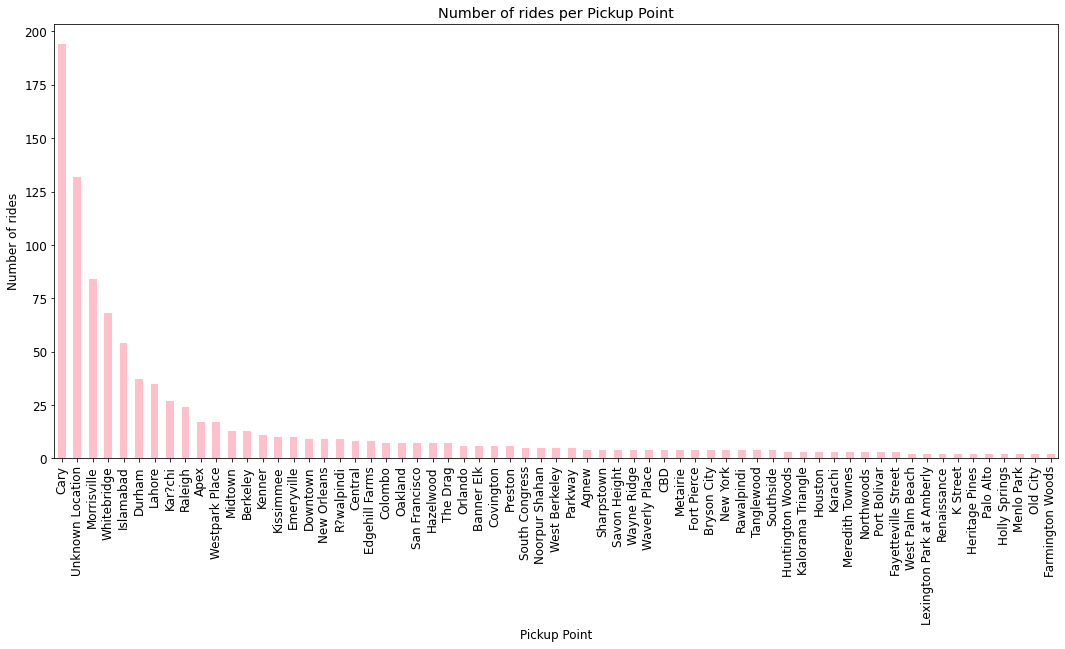

In [394]:
#Checking the most common pickup points of the Uber rides:

a = data3.Start_Point.value_counts().nlargest(65)
a.plot(kind='bar', figsize=(18,8),color=['pink'])
plt.title('Number of rides per Pickup Point')
plt.xlabel('Pickup Point')
plt.ylabel('Number of rides')

Most of the Uber rides have started from Cary and mostly pickup points are unknown.

Text(0, 0.5, 'Number of rides')

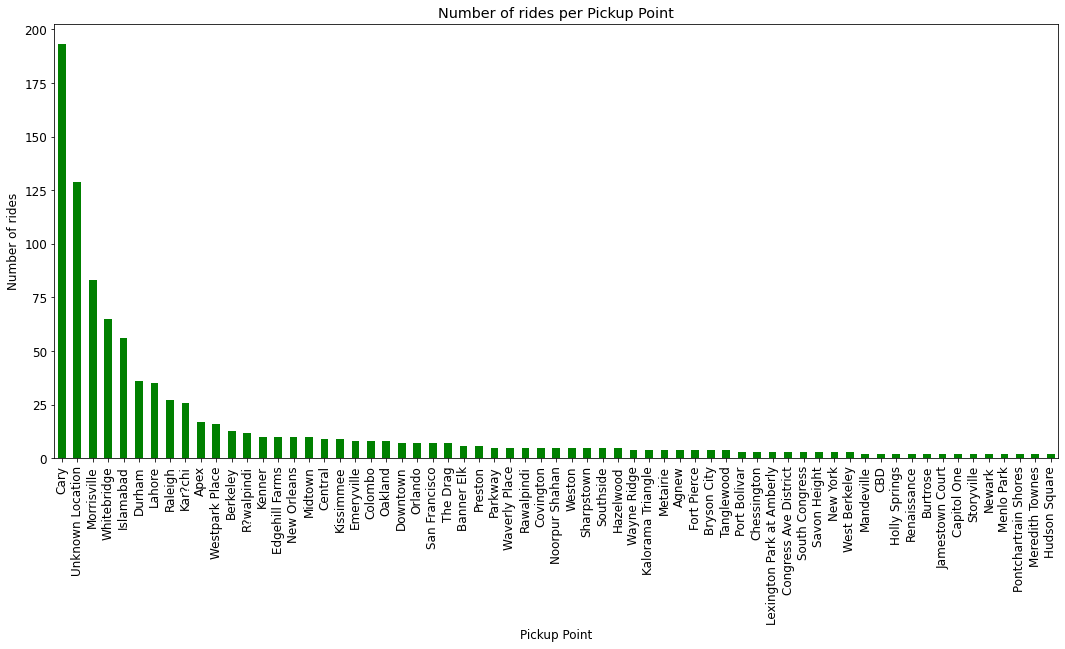

In [395]:
#Checking the most common dropoff points of the Uber rides:

b = data3.Stop_Point.value_counts().nlargest(65)
b.plot(kind='bar', figsize=(18,8),color=['green'])
plt.title('Number of rides per Pickup Point')
plt.xlabel('Pickup Point')
plt.ylabel('Number of rides')

Most of the Uber rides have ended at Cary and mostly dropoff points are unknown. There is a possibility of round rides because most of the pickup and dropoff locations are similar.

In [396]:
data3.shape

(1070, 12)

In [397]:
#Checking the rides which have similar pickup and dropoff locations

Required_Mile = data3.loc[data3['Start_Point'] == data3['Stop_Point']]
Required_Mile

,Start_Date,End_Date,Category,Start_Point,Stop_Point,Miles,Purpose,Ride_Duration,Year,Month,Day,Hour
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,00:06:00,2016,January,Friday,21
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Unknown,00:12:00,2016,January,Saturday,1
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,00:13:00,2016,January,Saturday,20
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,00:14:00,2016,January,Tuesday,17
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,00:04:00,2016,January,Wednesday,17
...,...,...,...,...,...,...,...,...,...,...,...,...
1147,2016-12-30 15:41:00,2016-12-30 16:03:00,Business,Kar?chi,Kar?chi,4.6,Errand/Supplies,00:22:00,2016,December,Friday,15
1148,2016-12-30 16:45:00,2016-12-30 17:08:00,Business,Kar?chi,Kar?chi,4.6,Meeting,00:23:00,2016,December,Friday,16
1149,2016-12-30 23:06:00,2016-12-30 23:10:00,Business,Kar?chi,Kar?chi,0.8,Customer Visit,00:04:00,2016,December,Friday,23
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,00:07:00,2016,December,Saturday,1


For around 25% rides (267 out of 1070 rides), the starting and ending locations are similar. This means that about 25% of the rides are round rides.

Text(0, 0.5, 'Number of rides')

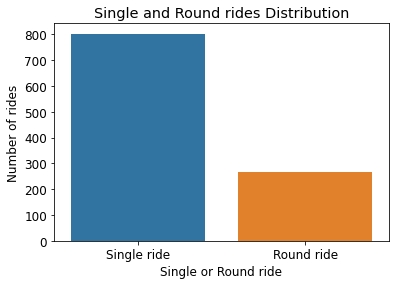

In [398]:
#Distribution of single and round rides

def Single_or_Round_rides(data3):
    if data3['Start_Point'] == data3['Stop_Point']:
        return 'Round ride'
    else:
        return 'Single ride'
    
data3['Single or Round ride'] = data3.apply(Single_or_Round_rides, axis=1)

sns.countplot(x='Single or Round ride',data=data3, order=data3['Single or Round ride'].value_counts().index)
plt.title('Single and Round rides Distribution')
plt.ylabel("Number of rides")


Clearly, the user has coovered 250+ round rides.

Text(0.5, 1.0, 'Purpose of Uber rides')

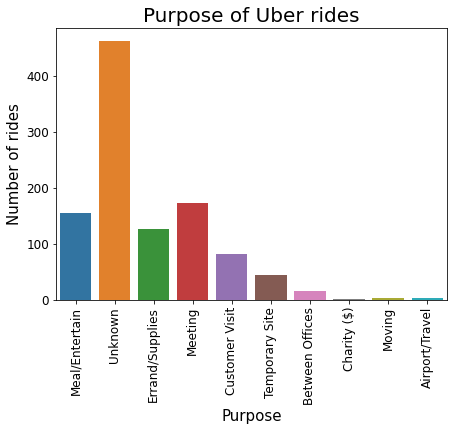

In [399]:
#To know for what purpose the user uses Uber for:

plt.figure(figsize=(7,5))
a = sns.countplot(x='Purpose', data = data3)
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_xlabel("Purpose", fontsize = 15)
a.set_ylabel("Number of rides", fontsize = 15)
a.set_title('Purpose of Uber rides', fontsize = 20)

It is evident that for most of the rides, the purpose is unknown. For other rides, the user prefers Uber rides to go for any meeting and for meal/entertainment purposes.

Text(0.5, 1.0, 'Category of Uber rides')

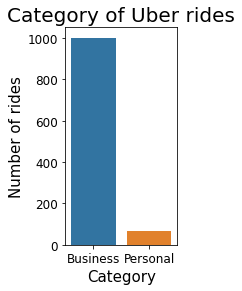

In [400]:
#To know for what category the user uses Uber for:

plt.figure(figsize=(2,4))
a = sns.countplot(x='Category', data = data3)
a.set_xticklabels(a.get_xticklabels())
a.set_xlabel("Category", fontsize = 15)
a.set_ylabel("Number of rides", fontsize = 15)
a.set_title('Category of Uber rides', fontsize = 20)

The user prefers Uber rides for his/her business work for 9500+ rides and for very small number of rides, the user travels for personal reasons.

In [401]:
#Checking the maximum and minimum distance of Uber rides:

a = data3['Miles'].max()
print('Maximum ride distance is:', a, 'miles.')

b = data3['Miles'].min()
print('Minimum ride distance is:', b, 'miles.')


Maximum ride distance is: 20.3 miles.
Minimum ride distance is: 0.5 miles.


The maximum ride distance covered by the user is 20.3 miles while the minimum ride distance is 0.5 miles.

In [402]:
#Checking the number of rides for which the distance covered is <= 1 miles or 1.6 km i.e. very short rides

Required_Duration = data3.loc[data2['Miles'] <= 1.0]
Required_Duration.count()


Start_Date              40
End_Date                40
Category                40
Start_Point             40
Stop_Point              40
Miles                   40
Purpose                 40
Ride_Duration           40
Year                    40
Month                   40
Day                     40
Hour                    40
Single or Round ride    40
dtype: int64

The user has covered 40 very short rides out of 1070 rides.

In [403]:
#Determining the number of rides booked per month:

data3.groupby("Month")["Miles"].count()

Month
April         47
August       124
December     142
February     109
January       58
July         105
June         105
March        100
May           47
November     116
October       86
September     31
Name: Miles, dtype: int64

Text(0.5, 1.0, 'Number of Uber rides per month')

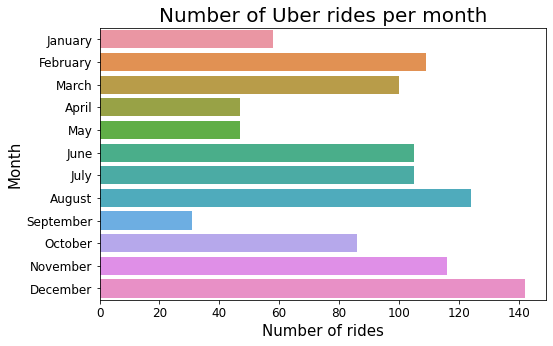

In [404]:
#Checking the number of rides per month:

plt.figure(figsize=(8,5))
a = sns.countplot(y='Month', data = data3)
a.set_yticklabels(a.get_yticklabels())
a.set_xlabel("Number of rides", fontsize = 15)
a.set_ylabel("Month", fontsize = 15)
a.set_title('Number of Uber rides per month', fontsize = 20)

The user has taken maximum Uber rides in the month of December, followed by August and November. These months are the profitable months for Uber based on the user's dataset.

In [405]:
#Determining the total mileage per month:

data3.groupby("Month")["Miles"].sum()

Month
April        422.4
August       795.7
December     774.6
February     750.5
January      387.1
July         709.4
June         743.6
March        613.5
May          317.7
November     563.1
October      658.9
September    277.3
Name: Miles, dtype: float64

Text(0, 0.5, 'Total Mileage')

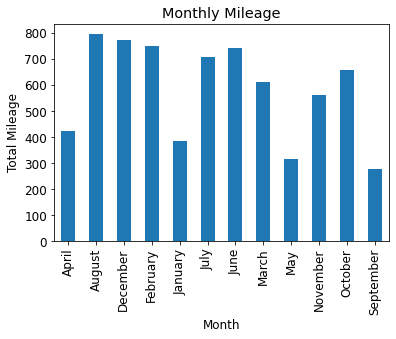

In [406]:
#Determining the total miles coverage per month:

Monthly_mileage = data3.groupby("Month")["Miles"].sum()
Monthly_mileage.plot(kind='bar')
plt.title("Monthly Mileage")
plt.ylabel('Total Mileage')

In the month of December, the user has taken a large number of short rides while in the month of October, the user has taken a short number of rides but the rides are long.

In [407]:
#Determining the number of rides per week day:

data3.groupby("Day")["Start_Point"].count()

Day
Friday       193
Monday       163
Saturday     133
Sunday       137
Thursday     138
Tuesday      170
Wednesday    136
Name: Start_Point, dtype: int64

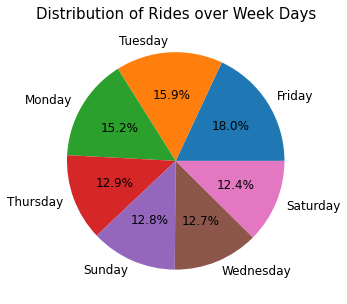

In [408]:
#Checking the percentage of the number of rides per day of the week:

types = data3["Day"].value_counts()
labels = types.index
values = types.values

plt.figure(figsize=(8, 5))
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.rc('font', size=12)
plt.title("Distribution of Rides over Week Days", fontsize=15)
plt.show()


The user has preferred 18 % of total Uber rides on Friday, followed by rides on Tusday and Monday. On rest of the days, the user has taken almost similar number of rides. 

There is almost similar distribution of the rides on all the week days.

In [409]:
#Identifying the locations which are the farthest and the nearest

data3.groupby(['Start_Point','Stop_Point'])['Miles'].sum().sort_values()

Start_Point       Stop_Point      
Soho              Tribeca               0.5
Katunayaka        Katunayaka            0.5
Central           West Berkeley         0.6
Sunnyside         Ingleside             0.7
Medical Centre    Tudor City            0.7
                                      ...  
Durham            Cary                334.4
Cary              Morrisville         356.5
                  Durham              390.0
Morrisville       Cary                395.7
Unknown Location  Unknown Location    559.5
Name: Miles, Length: 315, dtype: float64

This indicates that except those rides for which locations are unknown, Cary to Morrisville distance is the maximum distance ride followed by Cary to Durham while Soho to Tribeca has the minimum distance between them.

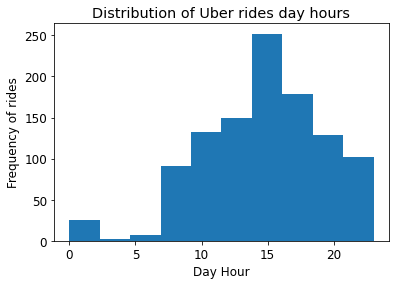

In [410]:
#Checking the preferred time of the day for Uber rides:

data3['Hour'].plot.hist()
plt.title('Distribution of Uber rides day hours')
plt.xlabel('Day Hour')
plt.ylabel('Frequency of rides')
plt.show()

From the plot, it is evident that the user takes Uber rides mostly during the day and evening hours. A very few rides have been taken in the early morning.

Text(0, 0.5, 'Number of rides')

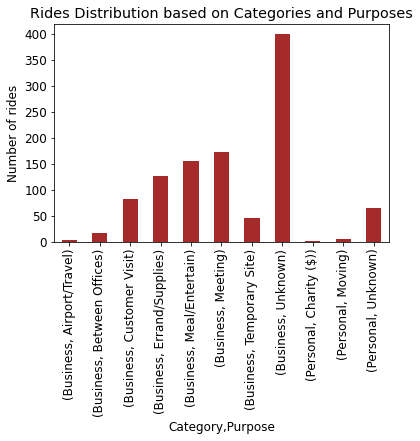

In [411]:
#Distribution of rides on the basis of their categories and purposes

Distribution = data3.groupby(["Category", "Purpose"])["Miles"].count()
Distribution.plot(kind='bar', color = 'brown')
plt.title("Rides Distribution based on Categories and Purposes")
plt.ylabel('Number of rides')

For most of the rides (400+ rides), the purpose is unknown and the user has travelled those rides mainly for business reasons.

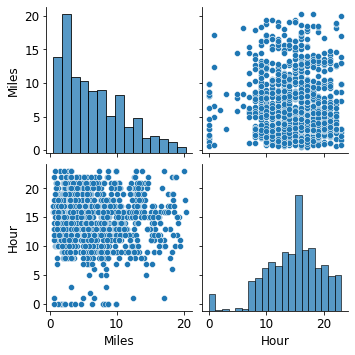

In [412]:
# Identifying is there any relationship between the rides mileage and the hour of the day at which the ride is taken:
sns.pairplot(data3, diag_kind = 'hist', vars = ['Miles', 'Hour'])


This clearly indicates that most of the rides for which the mileage is less than 20 miles, have been taken in the day and evening hours.

<AxesSubplot:>

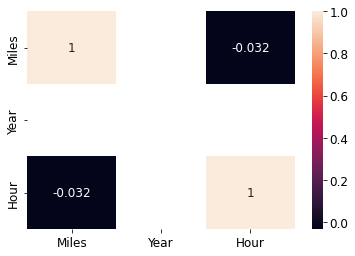

In [413]:
sns.heatmap(data3.corr(), annot=True)

It seems that the mileage of the ride is poorly correlated with the time at which the ride is taken. 

<AxesSubplot:title={'center':'Miles versus Ride Duration'}, xlabel='Ride_Duration', ylabel='Miles'>

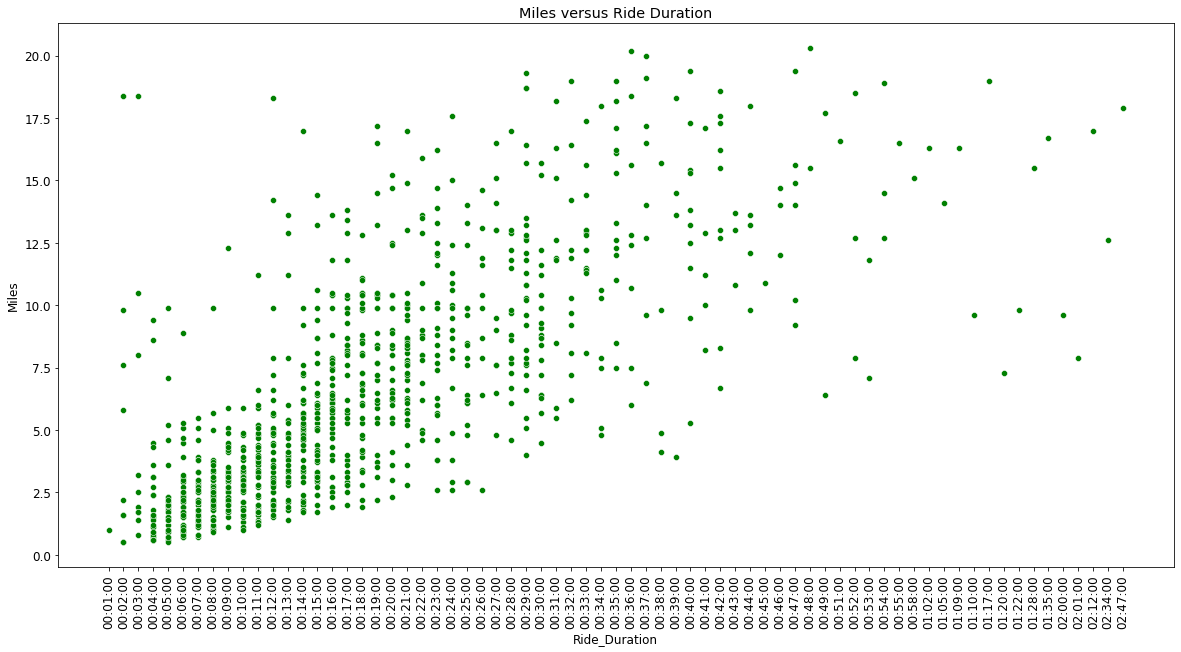

In [414]:
#Miles versus Ride Duration plot

plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
plt.title("Miles versus Ride Duration")

sorted_data3 = data3.sort_values(by='Ride_Duration')
sns.scatterplot(x="Ride_Duration", y="Miles", data=sorted_data3, color = 'green')


The scatter plot indicates that most of the rides which cover less mileage, take less time but there are also some rides for which the mileage is less but the duration is high. This might be because of the traffic, slow speed of the driver or red light signal.

Text(0.5, 1.0, 'Monthly and Daily Rides Distribution')

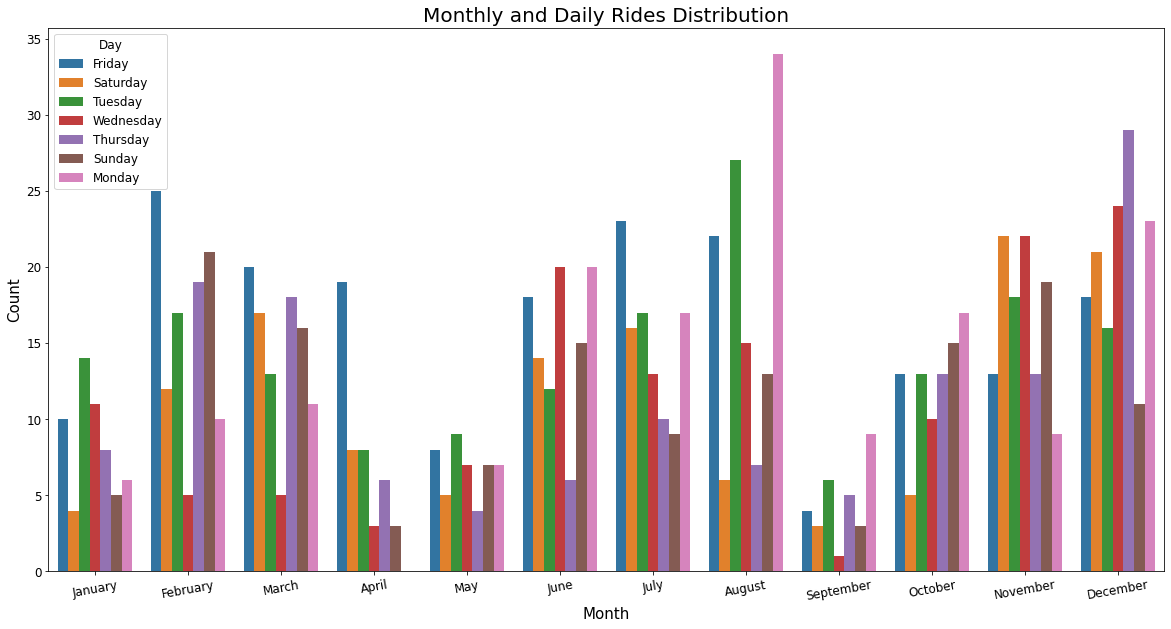

In [415]:
#Monthly and daily distribution of the rides

plt.figure(figsize=(20,10))
a = sns.countplot(x='Month', data = data3, hue = 'Day')
a.set_xticklabels(a.get_xticklabels(), rotation=10)
a.set_xlabel("Month", fontsize = 15)
a.set_ylabel("Count", fontsize = 15)
a.set_title('Monthly and Daily Rides Distribution', fontsize = 20)

It is clearly seen from this plot that for each month, the daily distribution of rides is different.

### Insights

From the Exploratory Data Analysis of the Uber rides dataset, following insights can be made:

1. The user seems to be a potential customer for Uber as the average ride he takes per day is approximate 3 rides.
2. December is the month when the user has taken a lot of rides while September is the month when the user has taken a small number of rides.
3. Most of the pickups and dropoffs occurred at Cary, Morrisville, Whitebridge, Islamabad etc. other than the unknown locations which indicates round rides and the user has covered approximate 25% round rides.
4. The longest ride duration is 2 hours 47 minutes while the maximum miles covered by the user is 20.3 miles.
5. The user has taken Uber rides mainly for Business reasons. For mostly rides, the purpose is unknown. Besides this, main purposes include meeting and meal or entertainment.
6. The average distance covered by the user is around 6.55 miles.
7. The user travels by Uber mostly during the day and evening hours. 
8. Cary to Morrisville distance is the maximum distance ride followed by Cary to Durham while Soho to Tribeca has the minimum distance between them, except those rides whose locations are unknown.
9. The user has covered 40 very short rides (having mileage <= 1 mile) out of 1070 rides.